In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

First, load the dataframe.

In [2]:
df = pd.read_csv("./data/joined_shots_2013.csv")
df.head()

,Unnamed: 0,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,DRIBBLES,FGM,FINAL_MARGIN,GAME_CLOCK,GAME_ID,GAME_ID.1,...,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,0,"Turner, Evan",202323.0,1.9,17.0,0.0,10.0,8:09,21300165,21300165,...,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6.0,-40.0,53.0,1.0,0.0
1,1,"Turner, Evan",202323.0,3.2,0.0,1.0,10.0,9:10,21300165,21300165,...,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26.0,182.0,195.0,1.0,1.0
2,2,"Carter-Williams, Michael",203487.0,3.5,0.0,0.0,10.0,8:36,21300165,21300165,...,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26.0,159.0,206.0,1.0,0.0
3,3,"Brown, Lorenzo",203485.0,3.6,19.0,0.0,10.0,0:23,21300165,21300165,...,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27.0,-15.0,274.0,1.0,0.0
4,0,"Cole, Norris",202708.0,3.7,0.0,1.0,-7.0,11:43,21300230,21300230,...,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24.0,-149.0,198.0,1.0,1.0


SHOT_RESULT can be used as a target feature.

In [3]:
target_feature = "SHOT_RESULT"

There is an unnamed feature, and it is not clear what it represents. Let's explore the feature.

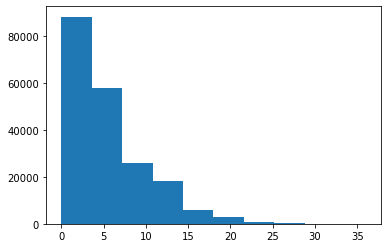

In [4]:
df.rename(columns={"Unnamed: 0": "UNKNOWN"}, inplace=True)
plt.hist(df["UNKNOWN"])
plt.show()

Check for some kind of relationship with GAME_ID.

In [5]:
df.groupby(["GAME_ID"]).agg(
    count=("UNKNOWN", lambda x: len(x)),
    num_unique=("UNKNOWN", lambda x: len(set(x))),
    min=("UNKNOWN", min),
    max=("UNKNOWN", max)
).head(20)

,count,num_unique,min,max
GAME_ID,,,,
21300001,158,14,0,13
21300002,155,18,0,17
21300003,176,15,0,14
21300004,166,18,0,17
21300005,165,19,0,18
21300006,146,19,0,18
21300007,152,21,0,20
21300008,144,16,0,15
21300009,159,16,0,15


Maybe the feature is related to both GAME_ID and PLAYER_ID.

In [6]:
df.groupby(["GAME_ID", "PLAYER_ID"]).agg(
    count=("UNKNOWN", lambda x: len(x)),
    num_unique=("UNKNOWN", lambda x: len(set(x))),
    min=("UNKNOWN", min),
    max=("UNKNOWN", max)
).head()



count  num_unique  min  max
GAME_ID  PLAYER_ID                             
21300001 2449.0         7           7    0    6
         2561.0        11          11    0   10
         2749.0        11           4    0    3
         101131.0       5           5    0    4
         101133.0       1           1    0    0

Check with which other features does it correlate the most.

In [7]:
df.corr()["UNKNOWN"].sort_values(ascending=False)


UNKNOWN                       1.000000
SHOT_NUMBER                   0.979091
GAME_EVENT_ID                 0.640689
PERIOD                        0.616972
PERIOD.1                      0.616926
TOUCH_TIME                    0.113024
DRIBBLES                      0.105877
LOC_Y                         0.033849
TEAM_ID                       0.021216
SHOT_DIST                     0.018131
SHOT_DISTANCE                 0.014048
CLOSEST_DEFENDER_PLAYER_ID    0.012994
GAME_ID.1                     0.009037
GAME_ID                       0.009037
PTS_TYPE                      0.007160
PLAYER_ID                    -0.004395
PLAYER_ID.1                  -0.004395
FINAL_MARGIN                 -0.006798
PTS                          -0.008166
FGM                          -0.008380
SHOT_MADE_FLAG               -0.008475
LOC_X                        -0.010736
SECONDS_REMAINING            -0.018104
SHOT_CLOCK                   -0.034155
CLOSE_DEF_DIST               -0.035783
MINUTES_REMAINING        

The highest correlation is with the SHOT_NUMBER. Let's explore the relationship a bit further.

In [8]:
df.groupby(["GAME_ID", "PERIOD"])[["UNKNOWN", "SHOT_NUMBER"]].head()

,UNKNOWN,SHOT_NUMBER
0,0,1.0
1,1,2.0
2,2,3.0
3,3,4.0
4,0,1.0
...,...,...
180625,0,6.0
185853,0,5.0
185854,1,6.0
185855,2,7.0


It seems that almost always, the unknown feature is equal to SHOT_NUMBER-1. But, sometimes it's not the case.

In [9]:
len(df.loc[df["UNKNOWN"] != df["SHOT_NUMBER"]-1, :].groupby(["GAME_ID"]))

342

Since it is now obvious that the unknown feature is almost identical to SHOT_NUMBER, and does not provide any extra information, we can drop it.

In [10]:
df.drop(columns=["UNKNOWN"], inplace=True)

In [11]:
df.head()

,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,DRIBBLES,FGM,FINAL_MARGIN,GAME_CLOCK,GAME_ID,GAME_ID.1,LOCATION,...,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,"Turner, Evan",202323.0,1.9,17.0,0.0,10.0,8:09,21300165,21300165,A,...,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6.0,-40.0,53.0,1.0,0.0
1,"Turner, Evan",202323.0,3.2,0.0,1.0,10.0,9:10,21300165,21300165,A,...,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26.0,182.0,195.0,1.0,1.0
2,"Carter-Williams, Michael",203487.0,3.5,0.0,0.0,10.0,8:36,21300165,21300165,A,...,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26.0,159.0,206.0,1.0,0.0
3,"Brown, Lorenzo",203485.0,3.6,19.0,0.0,10.0,0:23,21300165,21300165,A,...,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27.0,-15.0,274.0,1.0,0.0
4,"Cole, Norris",202708.0,3.7,0.0,1.0,-7.0,11:43,21300230,21300230,H,...,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24.0,-149.0,198.0,1.0,1.0


LOC_X and LOC_Y seem to be some kind of coordinates, but it is unclear which unit scale is used, or where is the origin. Let's explore the features.

In [12]:
df.loc[:, ["LOC_X", "LOC_Y"]].describe()

,LOC_X,LOC_Y
count,200963.000000,200963.000000
mean,-0.449496,80.807606
std,109.038567,87.439261
min,-250.000000,-51.000000
25%,-54.000000,9.000000
50%,1.000000,41.000000
75%,51.000000,153.000000
max,250.000000,865.000000


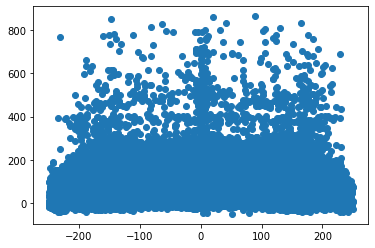

In [13]:
plt.scatter(df["LOC_X"], df["LOC_Y"])
plt.show()

From the scatter plot, it seems like the units are in inches and the origin represents the location of the basket.

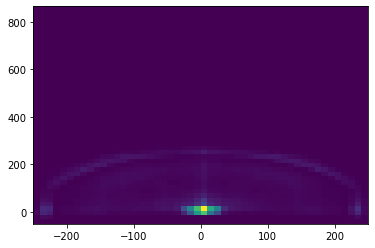

In [14]:
plt.hist2d(df["LOC_X"], df["LOC_Y"], bins=50)
plt.show()

Heatmap confirms the suspition of the origin being the basket. The range of LOC_Y seems much larger than LOC_X, unneccessarily so.

<AxesSubplot:>

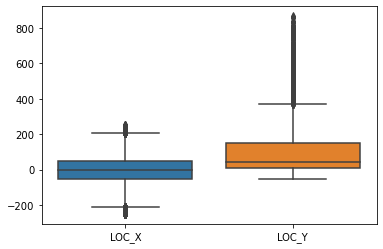

In [15]:
import seaborn as sns

sns.boxplot(data=df[["LOC_X", "LOC_Y"]])

Boxplots clearly show that LOC_Y has many outliers. If the coordinates are in inches, we can try to calculate the shot distance. We expect to get similar results to already available features, SHOT_DIST and SHOT_DISTANCE.

In [16]:
from math import sqrt

INCHES_IN_FOOT = 12

df.loc[:, "SHOT_DISTANCE_FROM_LOC"] = df.loc[:, ["LOC_X", "LOC_Y"]].apply(lambda s : sqrt(s["LOC_X"] ** 2 + s["LOC_Y"] ** 2) / INCHES_IN_FOOT, axis=1)
df[["SHOT_DIST", "SHOT_DISTANCE", "SHOT_DISTANCE_FROM_LOC"]].describe()


,SHOT_DIST,SHOT_DISTANCE,SHOT_DISTANCE_FROM_LOC
count,200963.000000,200963.000000,200963.000000
mean,13.486102,12.303230,10.658849
std,8.896573,9.848454,8.209524
min,0.000000,0.000000,0.083333
25%,4.700000,2.000000,2.013841
50%,13.400000,13.000000,10.863420
75%,22.400000,22.000000,19.008953
max,46.800000,86.000000,72.463880


It seems that the features are similar, but not quite the same. Let's explore the relationship further.

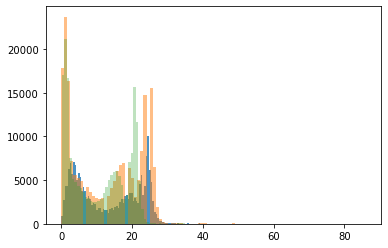

In [17]:
plt.hist(df["SHOT_DIST"], bins=100, alpha=0.8)
plt.hist(df["SHOT_DISTANCE"], bins=100, alpha=0.5)
plt.hist(df["SHOT_DISTANCE_FROM_LOC"], bins=100, alpha=0.3)
plt.show()

All features seem to have similar distribution, with many outliers. Let's confirm the suspitions using the boxplot.

<AxesSubplot:>

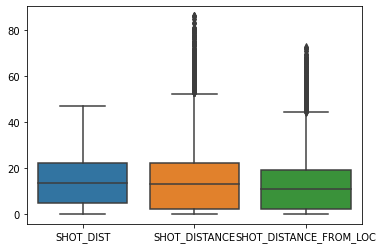

In [18]:
# many outliers

sns.boxplot(data=df.loc[:, ["SHOT_DIST", "SHOT_DISTANCE", "SHOT_DISTANCE_FROM_LOC"]])

SHOT_DIST seems the most reliable, as it as the least amount of outliers. Other two features are dropped.

In [19]:
df.drop(columns=["SHOT_DISTANCE", "SHOT_DISTANCE_FROM_LOC"], inplace=True)


Now, let's explore the time variables.

In [20]:
df.loc[:, ["GAME_CLOCK", "MINUTES_REMAINING", "SECONDS_REMAINING"]].head()

,GAME_CLOCK,MINUTES_REMAINING,SECONDS_REMAINING
0,8:09,8.0,6.0
1,9:10,9.0,7.0
2,8:36,8.0,33.0
3,0:23,0.0,21.0
4,11:43,11.0,41.0


It seems that there is a mismatch between the features, even though they represent the same data.

In [21]:
len(df.loc[df["GAME_CLOCK"] == "0:00", :])

848

In [22]:
df.loc[
    (df["SECONDS_REMAINING"] == 0) &
    (df["MINUTES_REMAINING"] == 0)
, ["GAME_CLOCK", "SECONDS_REMAINING", "MINUTES_REMAINING"]].head()

,GAME_CLOCK,SECONDS_REMAINING,MINUTES_REMAINING
168,0:02,0.0,0.0
582,0:01,0.0,0.0
610,0:01,0.0,0.0
646,0:07,0.0,0.0
688,0:03,0.0,0.0


Since it is unclear which feature is more reliable, MINUTES_REMAINING and SECONDS_REMAINING will be dropped.

In [23]:
df.drop(columns=["MINUTES_REMAINING", "SECONDS_REMAINING"], inplace=True)

In accordance to the paper, let's engineer a new feature, TOTAL_GAME_TIME, which is equal to the number of seconds until the end of the game.

In [24]:
from utils import total_game_time

df.loc[:, "TOTAL_GAME_TIME"] = df.loc[:, ["PERIOD", "GAME_CLOCK"]]\
    .apply(lambda s: total_game_time(s["PERIOD"], s["GAME_CLOCK"]), axis=1)

df.loc[:, ["GAME_CLOCK", "PERIOD", "TOTAL_GAME_TIME"]].head()

,GAME_CLOCK,PERIOD,TOTAL_GAME_TIME
0,8:09,2.0,1209.0
1,9:10,4.0,2710.0
2,8:36,4.0,2676.0
3,0:23,4.0,2183.0
4,11:43,2.0,1423.0


Before proceeding, let's check for perfectly redundant variables.

In [25]:
df.corr()

,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,DRIBBLES,FGM,FINAL_MARGIN,GAME_ID,GAME_ID.1,PERIOD,PERIOD.1,PTS,...,TOUCH_TIME,GAME_EVENT_ID,PLAYER_ID,PLAYER_ID.1,TEAM_ID,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,TOTAL_GAME_TIME
CLOSEST_DEFENDER_PLAYER_ID,1.000000,-0.006270,0.020181,0.000386,0.061263,0.017445,0.017445,0.028590,0.028579,0.001821,...,0.019327,0.041082,0.002802,0.002802,-0.001184,-0.008312,0.018755,NaN,0.000393,0.026065
CLOSE_DEF_DIST,-0.006270,1.000000,-0.141503,-0.005657,0.027544,0.003190,0.003190,-0.003219,-0.003237,0.060258,...,-0.148272,-0.003265,-0.009852,-0.009852,-0.012932,-0.014847,0.355806,NaN,-0.005751,-0.003595
DRIBBLES,0.020181,-0.141503,1.000000,-0.042959,-0.004961,0.011885,0.011885,0.048740,0.048772,-0.061825,...,0.926792,0.068985,0.049884,0.049884,-0.003283,0.013436,0.009150,NaN,-0.042670,0.022843
FGM,0.000386,-0.005657,-0.042959,1.000000,0.063911,0.009057,0.009057,-0.016117,-0.016100,0.970609,...,-0.060836,-0.019652,-0.010374,-0.010374,0.000552,-0.000524,-0.154393,NaN,0.998766,-0.011351
FINAL_MARGIN,0.061263,0.027544,-0.004961,0.063911,1.000000,0.002170,0.002170,-0.005733,-0.005726,0.067227,...,-0.003418,-0.008141,-0.064191,-0.064191,0.020382,-0.001332,-0.004164,NaN,0.063903,-0.003420
GAME_ID,0.017445,0.003190,0.011885,0.009057,0.002170,1.000000,1.000000,0.002231,0.002236,0.010050,...,0.009704,-0.005354,0.016375,0.016375,0.000564,-0.003604,0.004569,NaN,0.009074,0.001933
GAME_ID.1,0.017445,0.003190,0.011885,0.009057,0.002170,1.000000,1.000000,0.002231,0.002236,0.010050,...,0.009704,-0.005354,0.016375,0.016375,0.000564,-0.003604,0.004569,NaN,0.009074,0.001933
PERIOD,0.028590,-0.003219,0.048740,-0.016117,-0.005733,0.002231,0.002231,1.000000,0.999958,-0.008894,...,0.039736,0.956342,0.034107,0.034107,0.003103,0.000705,0.028184,NaN,-0.016122,0.968266
PERIOD.1,0.028579,-0.003237,0.048772,-0.016100,-0.005726,0.002236,0.002236,0.999958,1.000000,-0.008878,...,0.039776,0.956314,0.034102,0.034102,0.003100,0.000733,0.028181,NaN,-0.016105,0.968248
PTS,0.001821,0.060258,-0.061825,0.970609,0.067227,0.010050,0.010050,-0.008894,-0.008878,1.000000,...,-0.079835,-0.011767,-0.009693,-0.009693,-0.003226,-0.003829,-0.067192,NaN,0.969464,-0.005271


Perfectly redundant variables are dropped.

In [26]:
df.drop(columns=[
    "CLOSEST_DEFENDER", 
    "GAME_ID.1",
    "PERIOD.1",
    "PLAYER_NAME",
    "PLAYER_ID.1",
    "PTS",
    "SHOT_MADE_FLAG",
    "EVENT_TYPE",
    "FGM"
], inplace=True)

Let's check for missing values

In [27]:
df.isna().sum()

CLOSEST_DEFENDER_PLAYER_ID        0
CLOSE_DEF_DIST                    0
DRIBBLES                          0
FINAL_MARGIN                      0
GAME_CLOCK                        0
GAME_ID                           0
LOCATION                          0
MATCHUP                           0
PERIOD                            0
PTS_TYPE                          0
SHOT_CLOCK                    12475
SHOT_DIST                         0
SHOT_NUMBER                       0
SHOT_RESULT                       0
TOUCH_TIME                        0
W                                 0
GRID_TYPE                         0
GAME_EVENT_ID                     0
PLAYER_ID                         0
TEAM_ID                           0
ACTION_TYPE                       0
SHOT_TYPE                         0
SHOT_ZONE_BASIC                   0
SHOT_ZONE_AREA                    0
SHOT_ZONE_RANGE                   0
LOC_X                             0
LOC_Y                             0
SHOT_ATTEMPTED_FLAG         

SHOT_CLOCK is the only feature that has missing values.

In [28]:
df.loc[df["SHOT_CLOCK"].isna(), ["SHOT_CLOCK", "GAME_CLOCK"]].head()

,SHOT_CLOCK,GAME_CLOCK
4,NaN,11:43
5,NaN,9:36
7,NaN,10:48
8,NaN,10:30
9,NaN,8:26


In [29]:
len(df.loc[
    (df["SHOT_CLOCK"].isna()) &
    (df["GAME_CLOCK"] < "0:25"), :])

5673

In [30]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [31]:
df.drop(columns=["GAME_CLOCK", "PERIOD"], inplace=True)

In [32]:
df.nunique()

CLOSEST_DEFENDER_PLAYER_ID     480
CLOSE_DEF_DIST                 306
DRIBBLES                        35
FINAL_MARGIN                    86
GAME_ID                       1187
LOCATION                         2
MATCHUP                       2374
PTS_TYPE                         2
SHOT_CLOCK                     241
SHOT_DIST                      397
SHOT_NUMBER                     36
SHOT_RESULT                      2
TOUCH_TIME                     327
W                                2
GRID_TYPE                        1
GAME_EVENT_ID                  712
PLAYER_ID                      478
TEAM_ID                         30
ACTION_TYPE                     50
SHOT_TYPE                        2
SHOT_ZONE_BASIC                  7
SHOT_ZONE_AREA                   6
SHOT_ZONE_RANGE                  5
LOC_X                          414
LOC_Y                          337
SHOT_ATTEMPTED_FLAG              1
TOTAL_GAME_TIME               3318
dtype: int64

In [33]:
df.drop(columns=["GRID_TYPE", "SHOT_ATTEMPTED_FLAG"], inplace=True)

Let's extract the features from MATCHUP.

In [34]:
from utils import extract_from_matchup

df.loc[:, ["YEAR", "MONTH", "DAY", "TEAM_1", "TEAM_2"]] = df.MATCHUP.apply(
    lambda row: pd.Series(
        data=extract_from_matchup(row),
        index=["YEAR", "MONTH", "DAY", "TEAM_1", "TEAM_2"]
    ))
df.drop(columns=["MATCHUP"], inplace=True)

Finally, let's drop some more features. SHOT_ZONE_RANGE is the binned version of SHOT_DIST. DRIBBLES is highly correlated with TOUCH_TIME, but non-continuous. W is equal to the sign of FINAL_MARGIN, and PTS_TYPE is the binned version of SHOT_DISTANCE

In [35]:
# drop SHOT_ZONE_RANGE because its the binned version of SHOT_DIST
df.drop(columns=["SHOT_ZONE_RANGE"], inplace=True)

# drop DRIBBLES because it's highly correlated with TOUCH_TIME, but discrete
df.drop(columns=["DRIBBLES"], inplace=True)

# W = sgn(FINAL_MARGIN), PTS_TYPE = bin(SHOT_DISTANCE)
df.drop(columns=["W", "PTS_TYPE"], inplace=True)


Before proceeding, it's useful to split features into numerical and categorical ones.

In [36]:
categorical_features = [
    "CLOSEST_DEFENDER_PLAYER_ID", 
    "GAME_ID", 
    "LOCATION",
    "GAME_EVENT_ID",
    "PLAYER_ID", 
    "TEAM_ID",
    "ACTION_TYPE",
    "SHOT_TYPE",
    "SHOT_ZONE_BASIC",
    "SHOT_ZONE_AREA",
    "TEAM_1",
    "TEAM_2",
    "YEAR",
    "MONTH",
    "DAY",
]

numerical_features = [
    "CLOSE_DEF_DIST", 
    "FINAL_MARGIN", 
    "SHOT_CLOCK",
    "SHOT_DIST",
    "SHOT_NUMBER",
    "TOUCH_TIME", 
    "LOC_X", 
    "LOC_Y", 
    "TOTAL_GAME_TIME",
]

target = "SHOT_RESULT"

print(f"Total features: {len(df.columns)}")
print(f"Categorical features: {len(categorical_features)}")
print(f"Numerical features: {len(numerical_features)}")


Total features: 25
Categorical features: 15
Numerical features: 9


To make it easier to work with categorical features, we can encode their labels to numbers using ordinal encoding.

In [37]:
for column in categorical_features:
    column_cats = df.loc[:, column].astype("category")
    df.loc[:, [column]] = column_cats.cat.codes

The natural way to deal with categorical data when performing machine learning is to encode it using one-hot encoding. However, from the paper, we know that tree-based methods perform the best on the given dataset, particularly random forest and XGBoost.

Tree-based methods are known to not work well with high-cardinality categorical features that are one-hot encoded. The problem lies in the way that tree-based methods perform splits, according to the value of the feature. One-hot encoding is extremely sparse, and is exponentially more sparse as the cardinality of the feature grows. When the split occurs according to the one-hot encoded value, the tree ends up becoming very deep, as the large number of splits is needed to deal with all the different values of the feature. 

It has been empirically shown that the more simple ordinal encoding performs better in tree-based algorithms, even though it inherently provides wrong information to the algorithm, because it creates a natural way to order values which have no defined order, because they are categorical (more precisely - nominal, and not ordinal). Still, trees seem to be able to deal with that problem.

For the reasons described above, one-hot encoding will be performed only for categorical features of low cardinality, while the high cardinality features will be left with the simple ordinal encoding.

In [38]:
from utils import one_hot_encode

low_card_features = ["LOCATION", "SHOT_TYPE", "SHOT_ZONE_BASIC", "SHOT_ZONE_AREA"]

df = one_hot_encode(df, low_card_features)
df.head()


Finally, we are ready to train the algorithm. For my part, I have chosen to explore the random forest algorithm.

Before training, data is converted to numpy arrays.

In [40]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=["SHOT_RESULT"]).to_numpy()
y = df.loc[:, "SHOT_RESULT"]

y = LabelEncoder().fit_transform(y)

print(X.shape)
print(y.shape)

(188488, 33)
(188488,)


Split the data into the training set and the testing set.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=189)

Train the model without tuning hyperparameters, just to get a general feeling of the performance capabilities.

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.6646    0.5064    0.5748     25914
           1     0.6524    0.7838    0.7121     30633

    accuracy                         0.6567     56547
   macro avg     0.6585    0.6451    0.6435     56547
weighted avg     0.6580    0.6567    0.6492     56547



With more data and more features, the model achieves a more than 3% gain in accuracy, compared to the results from the paper.

Because there are more features, it is not clear whether all features are significant for the model performance. To test that, feature selection is performed. Using the mutual information metric, which can be applied to both numerical and categorical data, a grid search is performed to try to find the best possible subset of features, according to their importance ranking as obtained via the mutual information metric.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV

grid_search_params = {
    "kbest__k": range(10, 33+1)
}

pipe = Pipeline(steps=[
    ("kbest", SelectKBest(score_func=mutual_info_classif)),
    ("clf", RandomForestClassifier(n_jobs=-1))
])

grid = GridSearchCV(
    pipe,
    param_grid=grid_search_params,
    cv=20,
    scoring="accuracy",
    verbose=50,
    n_jobs=-1
)

grid.fit(X_train, y_train)

Grid search was computationally expensive, so it was performed on another machine. The results were saved to a pickle file. 

In [12]:
import pickle

with open("results/k_best_mutual_info_random_forest_20.pkl", "rb") as f:
    grid = pickle.load(f)

print(np.argmin(grid["rank_test_score"]) + 10)

33


It seems like truly all features are important for the random forest and the best accuracy is achieved by keeping all features.

Now that we know that, we can expand our dataset with data from another season.

In [43]:
df1 = pd.read_csv("data/joined_shots_2013.csv")
df2 = pd.read_csv("data/joined_shots_2014.csv")

df = pd.concat((df1, df2))
df.head()

,Unnamed: 0,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,DRIBBLES,FGM,FINAL_MARGIN,GAME_CLOCK,GAME_ID,GAME_ID.1,...,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,0,"Turner, Evan",202323.0,1.9,17.0,0.0,10.0,8:09,21300165,21300165,...,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6.0,-40.0,53.0,1.0,0.0
1,1,"Turner, Evan",202323.0,3.2,0.0,1.0,10.0,9:10,21300165,21300165,...,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26.0,182.0,195.0,1.0,1.0
2,2,"Carter-Williams, Michael",203487.0,3.5,0.0,0.0,10.0,8:36,21300165,21300165,...,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26.0,159.0,206.0,1.0,0.0
3,3,"Brown, Lorenzo",203485.0,3.6,19.0,0.0,10.0,0:23,21300165,21300165,...,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27.0,-15.0,274.0,1.0,0.0
4,0,"Cole, Norris",202708.0,3.7,0.0,1.0,-7.0,11:43,21300230,21300230,...,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24.0,-149.0,198.0,1.0,1.0


Preprocess the features in the same way as described above.

In [44]:
from utils import preprocessing

df = preprocessing(df)
df.head()

,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FINAL_MARGIN,GAME_ID,SHOT_CLOCK,SHOT_DIST,SHOT_NUMBER,SHOT_RESULT,TOUCH_TIME,GAME_EVENT_ID,...,SHOT_ZONE_BASIC_2,SHOT_ZONE_BASIC_3,SHOT_ZONE_BASIC_4,SHOT_ZONE_BASIC_5,SHOT_ZONE_BASIC_6,SHOT_ZONE_AREA_1,SHOT_ZONE_AREA_2,SHOT_ZONE_AREA_3,SHOT_ZONE_AREA_4,SHOT_ZONE_AREA_5
0,282,1.9,10.0,142,9.8,7.7,1.0,missed,13.5,162,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,282,3.2,10.0,142,8.1,23.5,2.0,made,1.4,448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,467,3.5,10.0,142,11.0,25.7,3.0,missed,1.3,451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,465,3.6,10.0,142,9.0,24.7,4.0,missed,14.5,574,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,351,2.4,-7.0,203,2.6,28.4,3.0,missed,4.5,158,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
from utils import prepare_input
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X, y = prepare_input(df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=189)


Train the baseline model on the new data.

In [46]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6760    0.5058    0.5787      8705
           1     0.6564    0.7957    0.7194     10328

    accuracy                         0.6631     19033
   macro avg     0.6662    0.6508    0.6490     19033
weighted avg     0.6654    0.6631    0.6550     19033



There is a slight improvement in accuracy. However, due to the nature of the variables and their meaning, the dataset is now corrupted.

The thing is, there is a lot of data which is dependant on the NBA season from which it was extracted. For example, players can change teams between the seasons, while the player name probably doesn't change. For that reason, same values within the dataset can mean different things.

If the features were dropped, the expected outcome of the model would be to achieve greater accuracy.

In [47]:
seasonal_features = [
    "CLOSEST_DEFENDER_PLAYER_ID",
    "GAME_ID",
    "GAME_EVENT_ID",
    "PLAYER_ID",
    "TEAM_ID",
    "TEAM_1",
    "TEAM_2",
    "YEAR",
    "MONTH",
    "DAY"
]

df.drop(columns=seasonal_features, inplace=True)


In [48]:
X, y = prepare_input(df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=189)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6598    0.5105    0.5756      8705
           1     0.6535    0.7782    0.7104     10328

    accuracy                         0.6558     19033
   macro avg     0.6567    0.6443    0.6430     19033
weighted avg     0.6564    0.6558    0.6488     19033



Wierdly enough, a drop in accuracy is observed. It seems that the data brings more information to the classification problem, than does it ruin the model by being corrupted within the seasons.